In [2]:
import pandas as pd
df = pd.read_csv("C:\\Users\\Personal\\DSp\Datasets\\iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
cluster         150 non-null int32
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


array([[0.40483539, 0.28009259],
       [0.19897959, 0.60034014],
       [0.69562648, 0.45390071]])

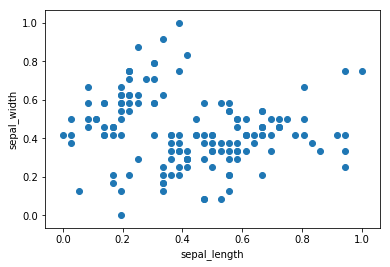

In [12]:
from sklearn.cluster import KMeans
# import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

# df = pd.read_csv("C:\\Users\\Personal\\DSp\Datasets\\iris.csv")

plt.scatter(df.sepal_length,df["sepal_width"])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal_length','sepal_width']])
y_predicted

df['cluster']=y_predicted
df.head()

km.cluster_centers_

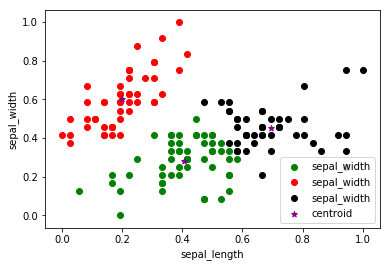

In [13]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.sepal_length,df1['sepal_width'],color='green')
plt.scatter(df2.sepal_length,df2['sepal_width'],color='red')
plt.scatter(df3.sepal_length,df3['sepal_width'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

array([[0.19897959, 0.60034014],
       [0.40483539, 0.28009259],
       [0.69562648, 0.45390071]])

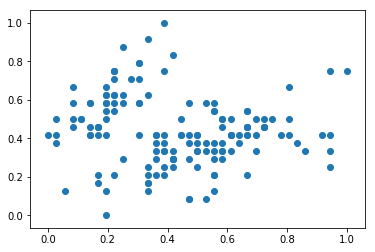

In [14]:
scaler = MinMaxScaler()

scaler.fit(df[['sepal_width']])
df['sepal_width'] = scaler.transform(df[['sepal_width']])

scaler.fit(df[['sepal_length']])
df['sepal_length'] = scaler.transform(df[['sepal_length']])
plt.scatter(df.sepal_length,df['sepal_width'])
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['sepal_length','sepal_width']])
y_predicted
km.cluster_centers_


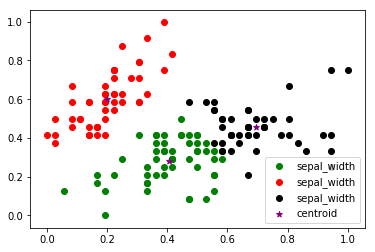

In [15]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.sepal_length,df1['sepal_width'],color='green')
plt.scatter(df2.sepal_length,df2['sepal_width'],color='red')
plt.scatter(df3.sepal_length,df3['sepal_width'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()


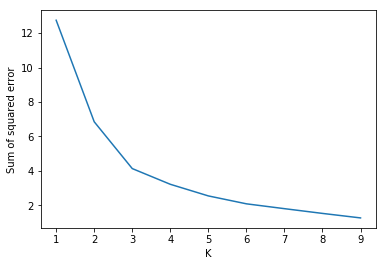

In [10]:

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal_length','sepal_width']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)